# Median US House price VS Median House Hold Income.

In [1]:
pip install fredapi

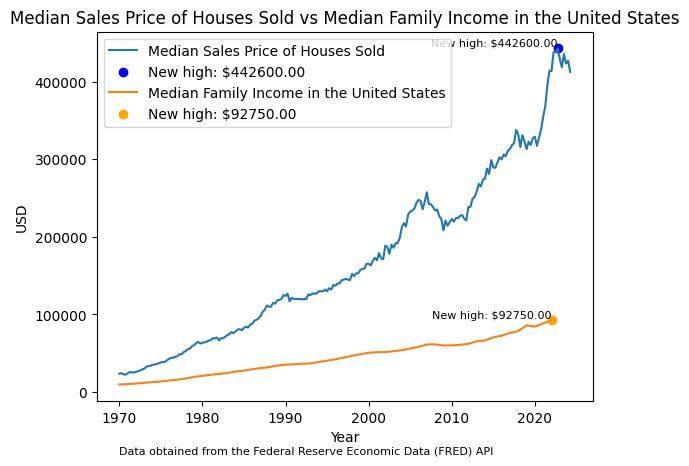

In [2]:
import matplotlib.pyplot as plt
from fredapi import Fred

# API key for FRED
fred = Fred(api_key="API")

# Fetch data for Median Sales Price of Houses Sold for the United States
sales_price = fred.get_series('MSPUS', '1970')

# Fetch data for Median Family Income in the United States
family_income = fred.get_series('MEFAINUSA646N', '1970')

# Find and label the new highs
sales_price_max = sales_price.max()
family_income_max = family_income.max()

plt.plot(sales_price.index, sales_price.values, label='Median Sales Price of Houses Sold')
plt.scatter(sales_price.idxmax(), sales_price_max, label=f'New high: ${sales_price_max:.2f}', color='blue')
plt.plot(family_income.index, family_income.values, label='Median Family Income in the United States')
plt.scatter(family_income.idxmax(), family_income_max, label=f'New high: ${family_income_max:.2f}', color='orange')
plt.title('Median Sales Price of Houses Sold vs Median Family Income in the United States')
plt.xlabel('Year')
plt.ylabel('USD')
plt.legend()

# Add labels for the new highs
plt.annotate(f'New high: ${sales_price_max:.2f}', xy=(sales_price.idxmax(), sales_price_max), xytext=(0, 0),
             textcoords='offset points', ha='right', va='bottom', fontsize=8)
plt.annotate(f'New high: ${family_income_max:.2f}', xy=(family_income.idxmax(), family_income_max), xytext=(0, 0),
             textcoords='offset points', ha='right', va='bottom', fontsize=8)

# Add citation
plt.text(sales_price.index[0], -sales_price_max*0.18, 'Data obtained from the Federal Reserve Economic Data (FRED) API', fontsize=8)

plt.show()


# US debt to GDP ratio
This indicator measures the federal government's total debt as a percentage of the country's GDP. A higher debt-to-GDP ratio indicates a more significant debt burden relative to the size of the economy. This can impact the government's ability to finance its debt and invest in other areas.


In [ ]:
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd


data = fred.get_series('GFDEGDQ188S', '1980')

# Define the start and end dates of US recessions
recessions = [ ('1980-01-01', '1980-07-01', 'Recession(1980)'),
              ('1981-07-01', '1982-11-01', 'Recession(1981-1982)'),
              ('1990-07-01', '1991-03-01', 'Recession(1990-1991)'),
              ('2001-03-01', '2001-11-01', 'Recession(2001)'),
              ('2007-12-01', '2009-06-01', 'Great Recession(2007-2009)'),
              ('2020-02-01', '2020-04-01', 'Corona Recession (1980 -2020')
              ]

# Create a figure and add a line plot for the GDP to debt ratio data
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data.values, mode='lines', name='US Federal Debt: Total Public Debt as Percent of GDP', line_color = "violet"))

# Add shaded rectangles for the US recessions
for start_date, end_date, name in recessions:
    fig.add_shape(type='rect', x0=start_date, y0=-1, x1=end_date, y1=140, fillcolor='grey', opacity=0.3, layer='below',
                  line=dict(width=0), name=name)

fig.update_layout(title='US Federal Debt: Total Public Debt as Percent of GDP (1980-2023)',
                  xaxis=dict(title='Year', showgrid=False),
                  yaxis=dict(title='Ratio', showgrid=True),
                  annotations=[dict(text='Shaded areas represents business cycle downturns', x=0, y=1.1, showarrow=False,
                                     font=dict(size=12, color='grey'), xref='paper', yref='paper', align='center'),
                               dict(text='Data From Fred API ', x=1, y=-0.2, showarrow=False,
                                     font=dict(size=10, color='grey'), xref='paper', yref='paper', align='right')],
                  width=600, height=400)



# Show the figure
fig.show()

# U.S. Manufacturing index


The U.S. Census Bureau's Manufacturers' New Orders: Total Manufacturing is a measure of the dollar value of new orders for both durable and non-durable goods in the manufacturing sector. This data indicates the level of demand for manufactured goods and is often used as a leading indicator of economic growth. An increase in new orders can indicate increased business activity and demand, while a decrease may indicate slowing economic activity. The data is publicly available through the FRED database, maintained by the Federal Reserve Bank of St. Louis.

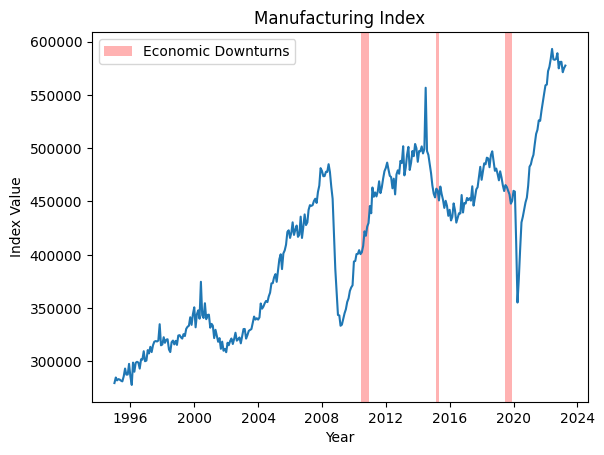

In [ ]:
import matplotlib.pyplot as plt

data = fred.get_series('AMTMNO', '1995')

# Define the start and end dates of economic downturns
downturns = [

    ('2010-06-01', '2010-12-01', 'Economic Downturns'),
             ('2015-03-01', '2015-05-01', 0),
             ('2019-07-01', '2019-12-01', 0)]

# Create the plot
fig, ax = plt.subplots()
ax.plot(data)

# Add shaded rectangles for economic downturns
for start_date, end_date, name in downturns:
  if name != 0:
    ax.axvspan(start_date, end_date, facecolor='red', alpha=0.3, label=name)
  else:
    ax.axvspan(start_date, end_date, facecolor='red', alpha=0.3)

# Set the title and axis labels
ax.set_title('Manufacturing Index')
ax.set_xlabel('Year')
ax.set_ylabel('Index Value')

# Show the legend
ax.legend(loc='best')

# Show the plot
plt.show()



# Corelation between cpi vs oil price


The Sticky Price Consumer Price Index (CPI) is calculated from a subset of goods and services included in the CPI that change price relatively infrequently. Because these goods and services change price relatively infrequently, they are thought to incorporate expectations about future inflation to a greater degree than prices that change on a more frequent basis. One possible explanation for sticky prices could be the costs firms incur when changing price.

Crude Oil Prices: Brent - Europe (DCOILBRENTEU) is the international crude oil price. It is a benchmark price for the North Sea Brent crude oil. The price is set by a daily auction of Brent crude oil futures contracts on the ICE Futures Europe exchange.

In [ ]:
# Get data for Core CPI
cpi_data = fred.get_series('CORESTICKM159SFRBATL')

# Get data for crude oil prices
oil_data = fred.get_series('DCOILBRENTEU')

In [ ]:
df = pd.DataFrame([])

df['cpi_data'] = cpi_data
df['oil_data'] = oil_data

In [ ]:
df.head()

,cpi_data,oil_data
1967-12-01,3.383497,NaN
1968-01-01,3.659987,NaN
1968-02-01,3.682012,NaN
1968-03-01,4.151668,NaN
1968-04-01,4.165427,NaN


In [ ]:
df.dropna(subset=['oil_data'], inplace=True)

print(df.isnull().sum())

print(df.head())


cpi_data    0
oil_data    0
dtype: int64
            cpi_data  oil_data
1987-06-01  4.175392     18.65
1987-07-01  4.166490     18.98
1987-09-01  4.291036     18.43
1987-10-01  4.343067     18.50
1987-12-01  4.302583     17.65


In [ ]:
df.corr()

,cpi_data,oil_data
cpi_data,1.000000,-0.324116
oil_data,-0.324116,1.000000


In [ ]:
df['cpi_pct_change'] = df['cpi_data'].pct_change()
df['oil_pct_change'] = df['oil_data'].pct_change()

df.index = pd.to_datetime(df.index)

df_yearly = df.groupby(pd.Grouper(freq='Y')).mean()
df.dropna()

df_yearly

,cpi_data,oil_data,cpi_pct_change,oil_pct_change
1987-12-31,4.255714,18.442000,0.007641,-0.013358
1988-12-31,4.650414,14.677500,0.013862,-0.011163
1989-12-31,4.787214,17.600000,0.001502,0.034985
1990-12-31,5.441887,23.757143,0.024256,0.141620
1991-12-31,4.970103,19.971250,-0.031870,-0.039874
1992-12-31,3.741805,19.738571,-0.029735,-0.022997
1993-12-31,3.496532,17.323333,0.002893,-0.027172
1994-12-31,3.262567,16.496250,-0.023455,0.026734
1995-12-31,3.306892,17.130000,0.019817,0.003916
1996-12-31,3.083238,19.896250,-0.015388,0.037897


In [ ]:
df.corr()

,cpi_data,oil_data,cpi_pct_change,oil_pct_change
cpi_data,1.000000,-0.324116,0.096342,-0.043304
oil_data,-0.324116,1.000000,0.228422,0.066612
cpi_pct_change,0.096342,0.228422,1.000000,0.103068
oil_pct_change,-0.043304,0.066612,0.103068,1.000000


In [ ]:
from scipy import stats

df['cpi_z_score'] = stats.zscore(df['cpi_data'])
df['oil_z_score'] = stats.zscore(df['oil_data'])

In [ ]:
df['cpi_data_cumsum'] =  df['cpi_pct_change'].cumsum()
df['oil_data_cum_sum'] = df['oil_pct_change'].cumsum()

df.corr()

,cpi_data,oil_data,cpi_pct_change,oil_pct_change,cpi_z_score,oil_z_score,cpi_data_cumsum,oil_data_cum_sum
cpi_data,1.000000,-0.324116,0.096342,-0.043304,1.000000,-0.324116,0.884369,-0.357356
oil_data,-0.324116,1.000000,0.228422,0.066612,-0.324116,1.000000,-0.111512,0.861255
cpi_pct_change,0.096342,0.228422,1.000000,0.103068,0.096342,0.228422,0.191426,0.188632
oil_pct_change,-0.043304,0.066612,0.103068,1.000000,-0.043304,0.066612,-0.049941,0.074190
cpi_z_score,1.000000,-0.324116,0.096342,-0.043304,1.000000,-0.324116,0.884369,-0.357356
oil_z_score,-0.324116,1.000000,0.228422,0.066612,-0.324116,1.000000,-0.111512,0.861255
cpi_data_cumsum,0.884369,-0.111512,0.191426,-0.049941,0.884369,-0.111512,1.000000,-0.037400
oil_data_cum_sum,-0.357356,0.861255,0.188632,0.074190,-0.357356,0.861255,-0.037400,1.000000


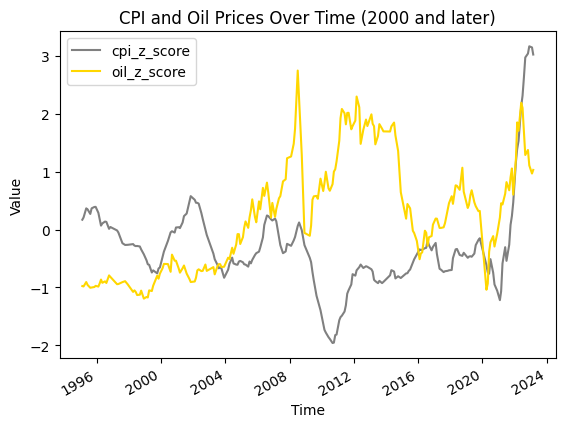

In [ ]:
df_filtered = df[df.index.year >= 1995]

df_filtered[['cpi_z_score', 'oil_z_score']].plot(color=['grey', 'gold'])

plt.title('CPI and Oil Prices Over Time (2000 and later)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()




Gross Domestic Product (GDP) Growth Rate

Definition: Measures the overall economic output and health of the economy.
Data Source: Bureau of Economic Analysis (BEA)
Impact: High growth is bullish for the stock market; low or negative growth can be bearish.